# Credit Score Rating

This is a Machine Learning project about predicting the credit score rating of individuals. The credit score ranges from 300 to 850 with 850 being the highest credit score rating. Dataset was found from Kaggle website. The dataset has 305 columns and the variables are not labeled. The total rows of the dataset is 80 000 . In this project, we are going to use regression models to predict the output variable of credit score for individuals. Th regression models that we are going to explore for this project include Linear Regression, Logistic regression ,Ridge, Lasso (to be used for feature select), Support Vector Machine, Decision Tree Regressor and finally Random Forest Regressor. We are also going to conduct metric performance meausures for regressions to meausure the performance of the model on test data. The metric perfomance measures to be used include R-squared, MSE, RMSE, MAE. Finally the best model with higher R-squared is going to be selected for PREDICTION OF CREDIT SCORE RATING for out TEST (unseen) data. 

In [20]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# enlarge graphs and plots
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [22]:
# import the dataset
credit_score = pd.read_csv("CreditScore_train.csv")
Test = pd.read_csv("CreditScore_test.csv")

In [23]:
credit_score.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


##  DATA PREPROCESSING

In [24]:
# Step 1 Check missing columns
#features_with_na = [features for features in credit_score.columns if credit_score[features].isnull().sum() > 1]
features_with_na = []
for features in credit_score.columns:
    if credit_score[features].isnull().sum() > 1:
        features_with_na.append(features)

print(f'Columns with NA values: {len(features_with_na)}')

Columns with NA values: 41


In [25]:
print(features_with_na)

['x002', 'x003', 'x004', 'x005', 'x041', 'x044', 'x045', 'x057', 'x058', 'x098', 'x148', 'x155', 'x162', 'x222', 'x223', 'x234', 'x235', 'x237', 'x238', 'x239', 'x242', 'x253', 'x255', 'x256', 'x257', 'x259', 'x265', 'x266', 'x267', 'x268', 'x272', 'x275', 'x287', 'x288', 'x289', 'x290', 'x293', 'x295', 'x297', 'x302', 'x304']


In [26]:
# check percentage of features with NA
for feature in features_with_na:
    if np.round(credit_score[feature].isnull().mean(), 4):
        print(f"{feature}:  {np.round(credit_score[feature].isnull().mean(),4) } % missing values")

x002:  0.2148 % missing values
x003:  0.2148 % missing values
x004:  0.2148 % missing values
x005:  0.0608 % missing values
x041:  0.3689 % missing values
x044:  0.1969 % missing values
x045:  0.1969 % missing values
x057:  0.3689 % missing values
x058:  0.3689 % missing values
x098:  0.8067 % missing values
x148:  0.4184 % missing values
x155:  0.7914 % missing values
x162:  0.6655 % missing values
x222:  0.3703 % missing values
x223:  0.3711 % missing values
x234:  0.1914 % missing values
x235:  0.2012 % missing values
x237:  0.3679 % missing values
x238:  0.3679 % missing values
x239:  0.3679 % missing values
x242:  0.9339 % missing values
x253:  0.6639 % missing values
x255:  0.7702 % missing values
x256:  0.7702 % missing values
x257:  0.7702 % missing values
x259:  0.7754 % missing values
x265:  0.6653 % missing values
x266:  0.6653 % missing values
x267:  0.6653 % missing values
x268:  0.6733 % missing values
x272:  0.0719 % missing values
x275:  0.5626 % missing values
x287:  0

The output above shows the columns with missing values and the percentage of missing values. For this model we will drop all the columns with missing values greater than **40%** and missing values below the threshold percentage of 40 will be included in the model and we will do data imputation for missing values. Missing values for these columns will therefore be replaced with the mean values of each column.

In [27]:
# Columns with NA% greater than 40%
columns_to_delete = []
for feature in features_with_na:
     if np.round(credit_score[feature].isnull().mean(), 4) > 0.4:
        columns_to_delete.append(feature)

print(f'Number of columns with NA% greater than 40% : {len(columns_to_delete)}')

Number of columns with NA% greater than 40% : 23


In [28]:
# delete columns from the train dataset
credit_score.drop(columns_to_delete, axis=1,inplace=True)

# delete columns from the test dataset
Test.drop(columns_to_delete, axis=1,inplace=True)

In [29]:
# replace missing values with mean for train data
def impute_missing_values(df):
    """ A function to replace missing values with mean values of each column """
    for features in df.columns:
        mean_value = df[features].mean()
        df[features].fillna(mean_value, inplace=True)

impute_missing_values(credit_score)

#check colums with NA value
credit_score.isnull().sum().sum()

0

In [30]:
# replace missing values with mean for TEST data
def impute_missing_values(df):
    """ A function to replace missing values with mean values of each column """
    for features in df.columns:
        mean_value = df[features].mean()
        df[features].fillna(mean_value, inplace=True)

impute_missing_values(Test)

#check colums with NA value
credit_score.isnull().sum().sum()

0

[Text(0.5, 1.0, 'Distribution of the dependant variable')]

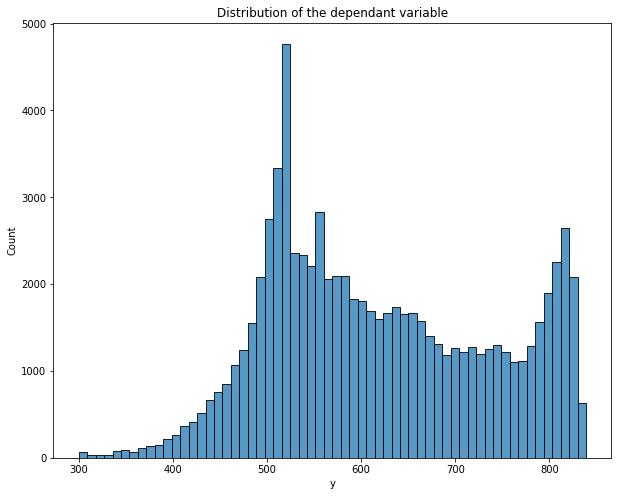

In [31]:
# STEP 3
# check the distribution of the dependant variable
sns.histplot(data = credit_score, x ='y').set(title='Distribution of the dependant variable')

# FEATURE SELECTION AND TRANSFORMATION

# Transforming data into a scaler

There are two main techniques for data trasnformation, 1.) Normalisation 2.) Standardization.
Since our dependant variable is not normally distributed, therefore we are going to use normalisation technique as our standard scaler.
Normalisation transforms data into a scale ranging from 0 to 1.


In [32]:
# divide our train dataset into X and y
X = credit_score.drop('y', axis=1)

# dependant variable to predict
y = credit_score['y']

In [33]:
# divide our TEST dataset into X and y
x_TEST = Test.drop('y', axis=1)

# dependant variable to predict
y_TEST = Test['y']

In [35]:
# import necessary sklearn package for scaling data
from sklearn.preprocessing import MinMaxScaler

# create an instance of a normalisation scaler
scaler = MinMaxScaler()

# fit the train data
scaler.fit(X)

# transform the data
scaled_data = scaler.transform(X)
X = pd.DataFrame(scaled_data, columns= X.columns)

# transform data for testing
scaler_test = MinMaxScaler()
scaler_test.fit(x_TEST)
scaled_TEST = scaler_test.transform(x_TEST)
x_TEST = pd.DataFrame(scaled_TEST, columns= x_TEST.columns)

# View trasnformed data
X.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x287,x291,x292,x294,x296,x298,x299,x300,x301,x303
0,0.646263,0.593315,0.055398,0.181818,0.539241,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.022801,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.767743,0.222841,0.002841,0.090909,0.202532,1.0,0.023256,0.018519,0.000000,0.030303,...,0.000000,0.006422,0.008195,0.0,0.006422,1.0,1.0,1.0,0.0,0.0
2,0.884187,0.227019,0.022727,0.147727,0.302532,0.0,0.000000,0.000000,0.012821,0.000000,...,0.278781,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.571688,0.174941,0.036339,0.092869,0.129114,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.0,1.0,1.0,0.0,0.0
4,0.800150,0.004178,0.002841,0.002841,0.078481,0.0,0.046512,0.018519,0.000000,0.000000,...,1.000000,0.006457,0.001145,0.0,0.006457,1.0,1.0,1.0,0.0,0.0


# Generalised Models

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import seaborn as sns

#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7000)

## 1. Linear Regression

We first perform a Linear Regression model without feature Engineering and we compare the negative mean squared error of the model to the ridge and lasso models.The negative mean sqaured error should be closer to **ZERO** for the model to perform better. We are also going to plot the histogram of the predictions and analyse the diagrams for all models. We will later apply the Least Absolute Shrinkage Selection (LASSO) for feature engineering.

In [35]:
# Performing Linear Regression without feature engineering.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# create an instance
lm = LinearRegression()

# 5 cross validation is used
# output is the mean sqaured error and it should be nearer to zero.
mse= cross_val_score(lm,X_train,y_train,scoring='neg_mean_squared_error', cv=5)

# fit the model
lm.fit(X,y)
#print(lm_regressor.best_score_)
#print(lm_regressor.best_params_)

mean_mse = np.mean(mse)
print(f"Negative Mean Squared Error: {round(mean_mse,4)}")

Negative Mean Squared Error: -2249.4299


[Text(0.5, 1.0, 'Linear Regression Model')]

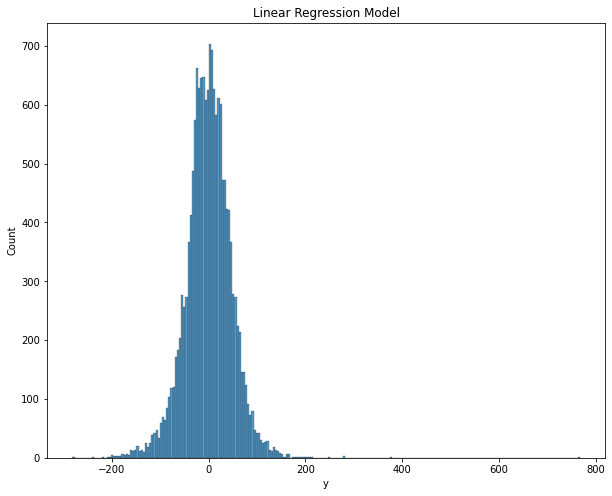

In [36]:
predictions_lm = lm.predict(X_test)
# plot the results
sns.histplot(y_test-predictions_lm).set(title='Linear Regression Model')

## 2. Ridge Regression

We perform the Ridge regression model to find the value **Lambda** using GridSearchCV. The Gridsearchcv is used to find which alpha values suits best for the problem statement. If the slope of regression (best fit line) is steep, it is likely to lead to overfitting. Ridge therefore pernalises features which have a higher slope (steep) to make the best fit line less steeper. The results of the Ridge regression is the mean sqaured error which will be compared with linear regression model and lasso regression model.

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# create an instance
ridge = Ridge()

# create the parameters for different values of alpha, alpha values should be greater than zero
parameters = {'alpha': np.arange(0.1,5,0.1)}

# initialise the Gridsearchcv 
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)
print(f"Negative Mean Sqaured Error: {round(ridge_regressor.best_score_,4)}")
print(ridge_regressor.best_params_)

Negative Mean Sqaured Error: -2246.804
{'alpha': 0.1}


[Text(0.5, 1.0, 'Ridge Regression Model')]

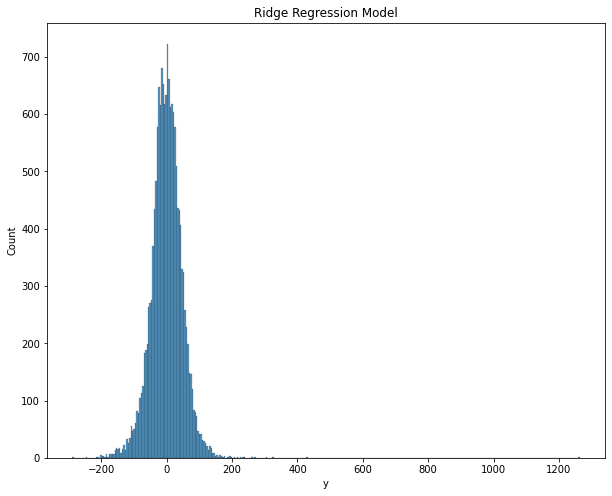

In [38]:
predictions_ridge = ridge_regressor.predict(X_test)
sns.histplot(y_test-predictions_ridge).set(title='Ridge Regression Model')

## 3. Lasso Regression


We finally perform the Lasso model using the Gridsearchcv to find the best value of alpha for the model. The Lasso model is useful for feature selection. Lasso deals with the problem of Multicollinearity where two or more predictor variables are highly correlated such that they do not provide unique information to the resgression model. Such feature slope values get shrinked to ZERO will be removed form the model. The results of the Lasso regression is the mean sqaured error which will be compared with Linear regression model and Ridge regression model for the best model.


In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# create an instance
lasso = Lasso()

# create the parameters for different values of alpha, alpha values should be greater than zero
parameters = {'alpha': np.arange(0.1,5,0.1)}

# initialise the Gridsearchcv 
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
print(f"Negative Mean Sqaured Error: {round(lasso_regressor.best_score_,4)}")
print(lasso_regressor.best_params_)

Negative Mean Sqaured Error: -2555.2522
{'alpha': 0.1}


[Text(0.5, 1.0, 'Lasso Regression Model')]

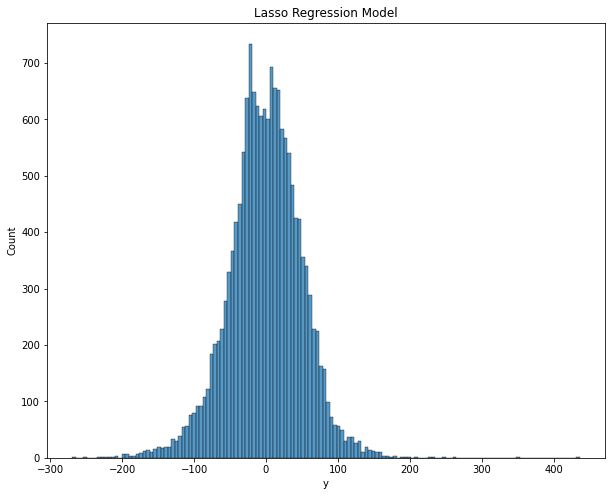

In [40]:
predictions_lasso = lasso_regressor.predict(X_test)
sns.histplot(y_test-predictions_lasso).set(title='Lasso Regression Model')

## Results of the Generalised Model

From the generalised model, the best model was the model with a lower value of negaitive mean squared error closer to ZERO, which was the **Ridge Regression** with a negative mean squared error of -2246.80. Linear regression was not far off with a negative mean squared error of -2249.42, However, Lasso regressor did not perform well as it had a higher negative mean squared error of -2555.25. From the plots, we also see that the plots for Ridge and Linear regression were more stable and normally distributed as compared to Lasso regression whic was not so much normally distributed. 


# Feature Selection using LASSO

Least Absolute Shrinkage Selection (LASSO) model will be is used for selection of the subset of variables. The regressor shrinks data towards a central point and helps build a simple model with fewer parameters. Lasso is considered a better model when the dataset has lots of variables (many features). Our dataset has 304 columns of independant variables.

In [37]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
# feature selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=7000))

# fit the model
feature_sel_model.fit(X,y)

# features with false are considered useless in predicting the dependant variable
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

The get_support()  function is used to check which features are selected for modelling. Features with Boolean value TRUE will be used in the model whereas those with a FALSE boolean are considered useless in predicting the dependant variable and will be removed from the model. 

In [38]:
# getting the list of selected features. 
selected_features = X.columns[(feature_sel_model.get_support())]

# Show some statistics
print(f'Total independant features :                {X.shape}')
print(f'Number of Select Features using LASSO:      {len(selected_features)}')
print(f'Features with coeffiecients shrank to zero: {np.sum(feature_sel_model.estimator_.coef_ == 0)}')

Total independant features :                (80000, 281)
Number of Select Features using LASSO:      152
Features with coeffiecients shrank to zero: 129


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# choosing selected features only
X = X[selected_features]

# split data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7000)

In [43]:
# choosing selected features FOR test data
x_TEST = x_TEST[selected_features]

# 1. LINEAR REGRESSION MODEL 

In [44]:
# create an instance of a model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# trains the data, pass in 2 arguments of the data we want to train
lm.fit(X_train,y_train)

#print the intercepts of the model
lm.intercept_

530.0576369121766

In [45]:
# check the coeeficients. Each coeeficient relate to columns in X_train
# create a dataframe of the coefficients
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
x001,10.918131
x002,-88.309634
x003,-67.463845
x004,158.458075
x005,93.668801
...,...
x298,-6.831803
x299,-2.766637
x300,-3.927721
x301,-13.851103


In [46]:
# get the predictions of credit score using the predict method, pass in the X-test data 
lm_predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Linear regression Predictions')

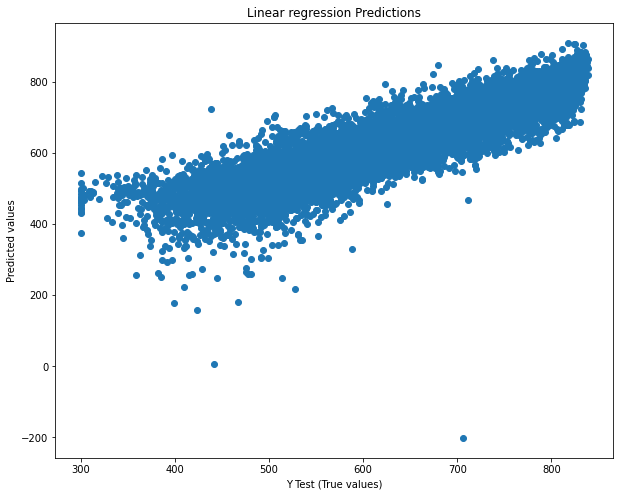

In [47]:
# visualize the results by using a scatter plot
plt.scatter(y_test, lm_predictions) 
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')
plt.title('Linear regression Predictions')

[Text(0.5, 1.0, 'Linear Regression Model')]

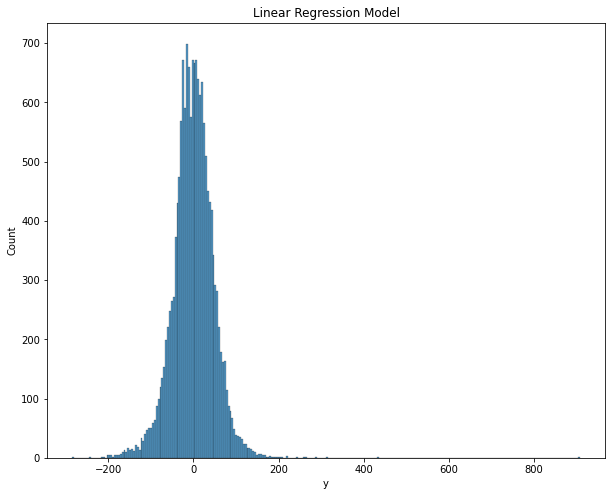

In [48]:
# create a histogram of the prediction of residuals.
# A normally distributed residual shows that a correct model was used
sns.histplot(y_test-lm_predictions).set(title='Linear Regression Model')

## Evaluation metrics for Linear model

In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score

print(f"R squared Score         ::   {r2_score(y_test, lm_predictions)}")
print(f"Mean Squared Error      ::   {metrics.mean_squared_error(y_test, lm_predictions)}")
print(f"Mean Absolute Error     ::   {metrics.mean_absolute_error(y_test, lm_predictions)}")
print(f"Root Mean Squared Error ::   {np.sqrt(metrics.mean_squared_error(y_test, lm_predictions))}")

R squared Score         ::   0.8358204757875431
Mean Squared Error      ::   2282.6500079293874
Mean Absolute Error     ::   35.8760473780658
Root Mean Squared Error ::   47.77708664129059


# 2. SUPPORT VECTOR REGRESSION

We run the model with Support Vector Regressor for regression problem. We will use the radial basis function 'rbf' as our kernel measure and hyper parameters were set to C=100, gamma=0.1 and epsilon=0.1. 

In [72]:
from sklearn.svm import SVR

#create an instance of svr
svm_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

# fit the model
svm_model.fit(X_train,y_train)



SVR(C=100, gamma=0.1)

In [73]:
# predictions usig svr
svm_predictions = svm_model.predict(X_test)


Text(0.5, 1.0, 'Support Vector Regression Predictions')

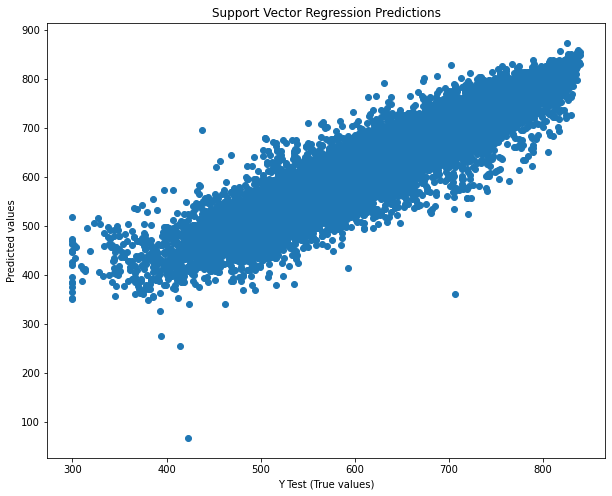

In [74]:
# visualize the results by using a scatter plot
plt.scatter(y_test, svm_predictions) 
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')
plt.title('Support Vector Regression Predictions')

[Text(0.5, 1.0, 'Support Vector Regressor')]

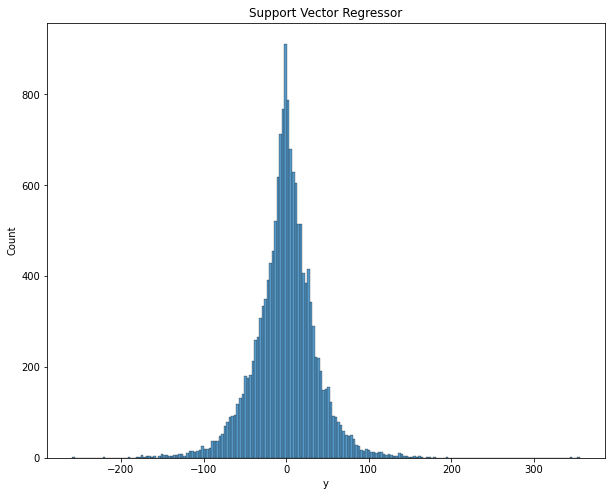

In [77]:
# create a histogram of the prediction of residuals.
# A normally distributed residual shows that a correct model was used
sns.histplot(y_test-svm_predictions).set(title='Support Vector Regressor')

## Evaluation metrics for Support Vector Machine

In [78]:
from sklearn import metrics

print(f"R squared Score         ::   {r2_score(y_test, svm_predictions)}")
print(f"Mean Squared Error      ::   {metrics.mean_squared_error(y_test, svm_predictions)}")
print(f"Mean Absolute Error     ::   {metrics.mean_absolute_error(y_test, svm_predictions)}")
print(f"Root Mean Squared Error ::   {np.sqrt(metrics.mean_squared_error(y_test, svm_predictions))}")


R squared Score         ::   0.8989234387890883
Mean Squared Error      ::   1405.3056515804972
Mean Absolute Error     ::   26.84621878655206
Root Mean Squared Error ::   37.487406573147965


# 3. LOGISTIC REGRESSION MODEL

In [79]:
from sklearn.linear_model import LogisticRegression

# instantitiate the model
logmodel = LogisticRegression()

# fit the model
logmodel.fit(X_train, y_train)

#print the intercepts of the model
logmodel.intercept_


C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.05289637, -0.95708077, -1.0635779 , -0.96284556, -0.98839801,
       -1.03917034, -1.01901334, -1.25008806, -0.84374362, -0.82987182,
       -0.90457149, -0.96970038, -1.1031908 , -0.88776147, -1.13392133,
       -0.80758516, -0.54342927, -0.85228737, -0.72721984, -0.85911744,
       -0.84621703, -1.1193319 , -0.90743238, -1.17929196, -0.87827256,
       -1.14947511, -0.8854003 , -1.18819746, -0.79437185, -0.83840308,
       -0.9705458 , -0.88846714, -0.74357326, -1.09697937, -1.0201336 ,
       -1.00616944, -0.77933143, -0.78597646, -1.0673097 , -1.05355757,
       -1.03187283, -1.14827   , -0.81946316, -1.07643885, -1.03545681,
       -0.91429834, -0.68625549, -0.98556321, -0.98606024, -0.79410646,
       -0.96065474, -1.02856287, -0.98684929, -0.98941025, -0.83664848,
       -1.14762029, -0.91655322, -1.67896145, -0.7109165 , -1.05524794,
       -1.14706762, -0.87187213, -0.93009861, -0.89915142, -0.85110217,
       -0.76892367, -0.33081801, -0.84605132, -0.8583528 , -1.25

In [80]:
# get the predictions of credit score using the predict method, pass in the X-test data 
log_predictions = logmodel.predict(X_test)

Text(0.5, 1.0, 'Logistic regression Predictions')

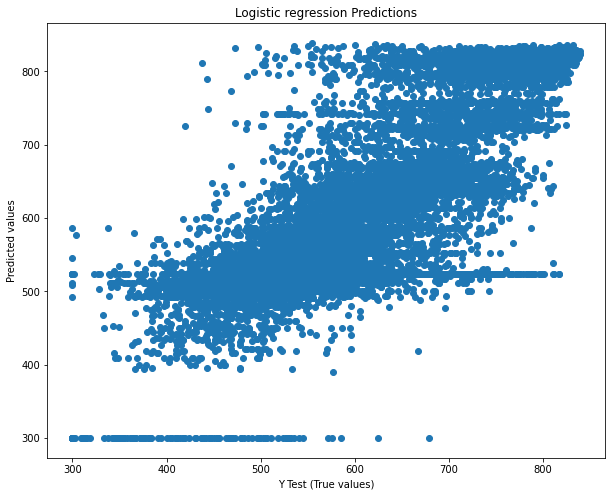

In [81]:
# visualize the results by using a scatter plot
plt.scatter(y_test, log_predictions) 
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')
plt.title('Logistic regression Predictions')

[Text(0.5, 1.0, 'Logistic Regression Model')]

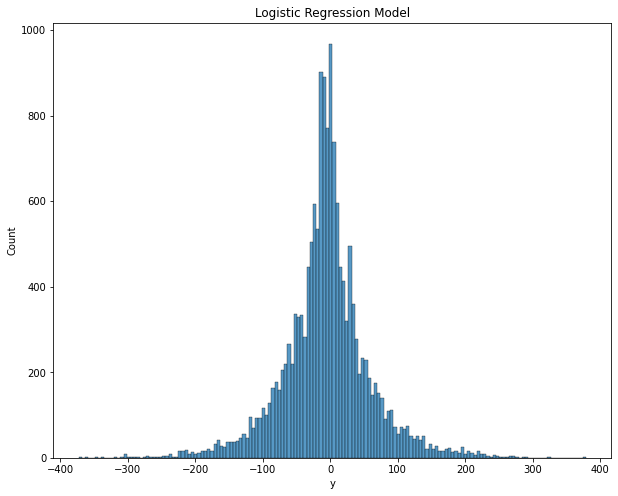

In [82]:
# create a histogram of the prediction of residuals.
# A normally distributed residual shows that a correct model was used

sns.histplot(y_test-log_predictions).set(title='Logistic Regression Model')

## Evaluation metrics for logistic model

In [83]:
from sklearn import metrics

print(f"R squared Score         ::   {r2_score(y_test, log_predictions)}")
print(f"Mean Squared Error      ::   {metrics.mean_squared_error(y_test, log_predictions)}")
print(f"Mean Absolute Error     ::   {metrics.mean_absolute_error(y_test, log_predictions)}")
print(f"Root Mean Squared Error ::   {np.sqrt(metrics.mean_squared_error(y_test, log_predictions))}")


R squared Score         ::   0.6883713201603876
Mean Squared Error      ::   4332.691375
Mean Absolute Error     ::   45.650625
Root Mean Squared Error ::   65.8231826562648


# 4. Decision Tree Regressor

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. 

In [84]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [85]:
tree = DecisionTreeClassifier(random_state=7000)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7000)

In [86]:
tree_predictions = tree.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Regressor Predictions')

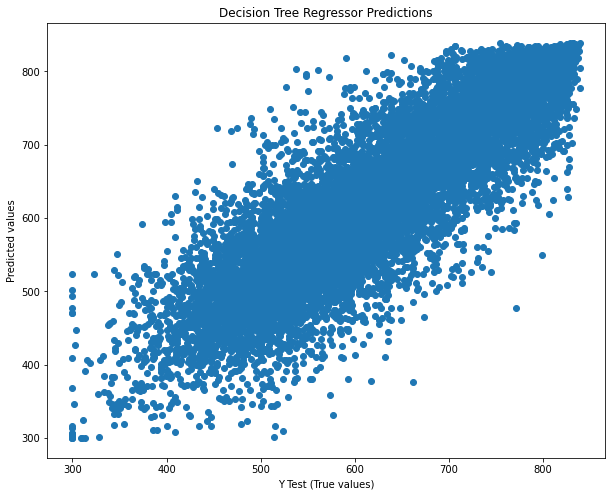

In [123]:
plt.scatter(y_test, tree_predictions) 
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')
plt.title('Decision Tree Regressor Predictions')

[Text(0.5, 1.0, 'Decision Tree Regressor')]

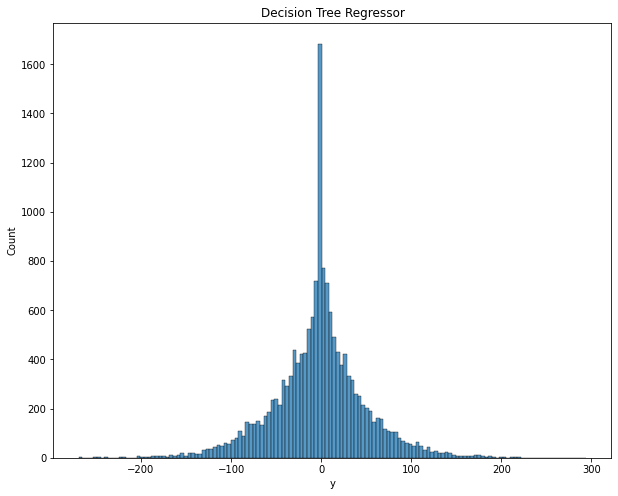

In [89]:
sns.histplot(y_test-tree_predictions).set(title='Decision Tree Regressor')

In [90]:
from sklearn import metrics

print(f"R squared Score         ::   {r2_score(y_test, tree_predictions)}")
print(f"Mean Squared Error      ::   {metrics.mean_squared_error(y_test, tree_predictions)}")
print(f"Mean Absolute Error     ::   {metrics.mean_absolute_error(y_test, tree_predictions)}")
print(f"Root Mean Squared Error ::   {np.sqrt(metrics.mean_squared_error(y_test, tree_predictions))}")

R squared Score         ::   0.8090050733851006
Mean Squared Error      ::   2655.4746875
Mean Absolute Error     ::   36.1836875
Root Mean Squared Error ::   51.531298135210996


# 5. Random Forest Regressor

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". 

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=7000)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7000)

In [45]:
forest_predictions = rf.predict(X_test)

Text(0.5, 1.0, 'Random Forest Regressor Predictions')

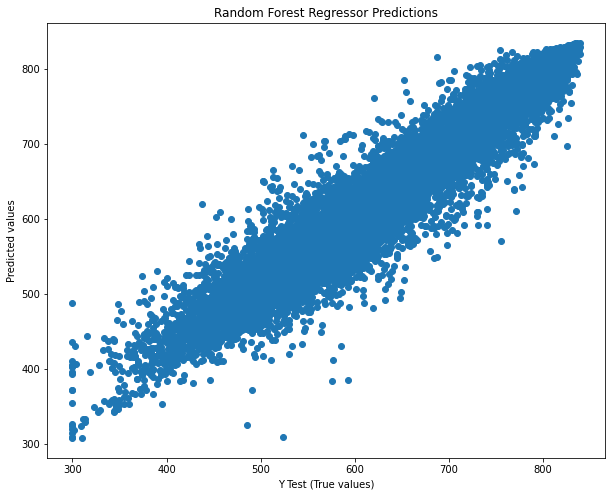

In [46]:
plt.scatter(y_test, forest_predictions) 
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor Predictions')

[Text(0.5, 1.0, 'Random Forest Regressor')]

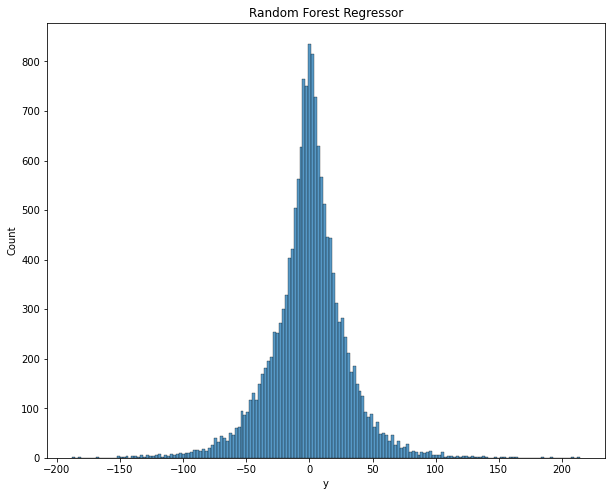

In [48]:
sns.histplot(y_test-forest_predictions).set(title='Random Forest Regressor')

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score

print(f"R squared Score         ::   {r2_score(y_test, forest_predictions)}")
print(f"Mean Squared Error      ::   {metrics.mean_squared_error(y_test, forest_predictions)}")
print(f"Mean Absolute Error     ::   {metrics.mean_absolute_error(y_test, forest_predictions)}")
print(f"Root Mean Squared Error ::   {np.sqrt(metrics.mean_squared_error(y_test, forest_predictions))}")

R squared Score         ::   0.933803563237074
Mean Squared Error      ::   920.35409181875
Mean Absolute Error     ::   21.349170625
Root Mean Squared Error ::   30.337338245448464


# RESULTS OF THE MODEL

R-squared error along with other performance metric measures will be used in choosing the best model for this particular regression problem. R-squared error indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

In [106]:
# import pandas library
import pandas as pd
details = {
    'R2' : [r2_score(y_test, forest_predictions),r2_score(y_test, svm_predictions),r2_score(y_test, lm_predictions) ,r2_score(y_test, tree_predictions), r2_score(y_test, log_predictions)],
    'MSE' : [metrics.mean_squared_error(y_test, forest_predictions) , metrics.mean_squared_error(y_test, svm_predictions),metrics.mean_squared_error(y_test, lm_predictions) ,metrics.mean_squared_error(y_test, tree_predictions), metrics.mean_squared_error(y_test, log_predictions)],
    'RMSE' : [np.sqrt(metrics.mean_squared_error(y_test, forest_predictions)) ,np.sqrt(metrics.mean_squared_error(y_test, svm_predictions)), np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)) ,np.sqrt(metrics.mean_squared_error(y_test, tree_predictions)), np.sqrt(metrics.mean_squared_error(y_test, log_predictions))],
    'MAE' : [metrics.mean_absolute_error(y_test, forest_predictions),metrics.mean_absolute_error(y_test, svm_predictions),metrics.mean_absolute_error(y_test, lm_predictions) ,metrics.mean_absolute_error(y_test, tree_predictions), metrics.mean_absolute_error(y_test, log_predictions)],
}

# creating a Dataframe object from dictionary with custom indexing of models
df = pd.DataFrame(details, index = ['Random_Forest', 'Support_Vector','Linear_model', 'Decision_Tree','logistic_model'])
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'MODELS'})
df

,MODELS,R2,MSE,RMSE,MAE
0,Random_Forest,0.933804,920.354092,30.337338,21.349171
1,Support_Vector,0.898923,1405.305652,37.487407,26.846219
2,Linear_model,0.835820,2282.650008,47.777087,35.876047
3,Decision_Tree,0.809005,2655.474688,51.531298,36.183687
4,logistic_model,0.688371,4332.691375,65.823183,45.650625


[Text(0.5, 1.0, 'R-squared Error')]

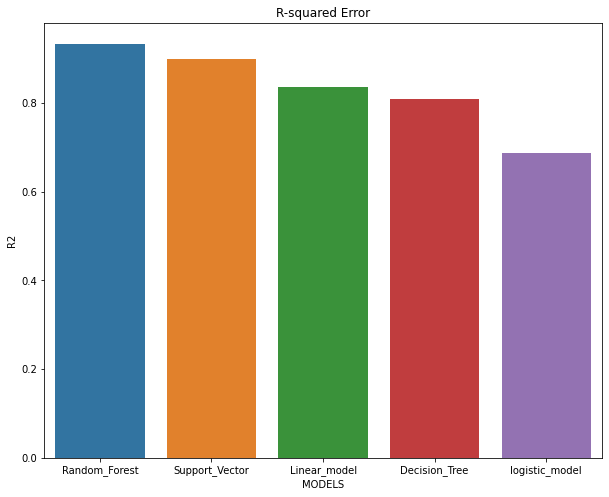

In [121]:
#plotting for r-squared error
sns.barplot(x ='MODELS',y='R2', data = df).set(title='R-squared Error')

**The best model for prediction of credit score rating was the Random Forest Regressor with R-squared of 93.33%, followed by a Support Vector Regressor with a R-squared of 89.89%.**

# RANDOM FOREST REGRESSOR ON TEST DATA - FINAL

In [51]:
# predictions usig svr
final_predictions = rf.predict(x_TEST)

Text(0.5, 1.0, 'Random Forest Regressor Predictions for TEST data')

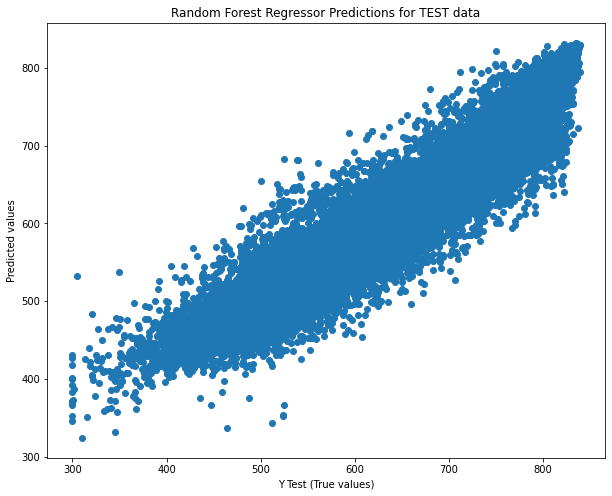

In [54]:
plt.scatter(y_TEST, final_predictions) 
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor Predictions for TEST data')

[Text(0.5, 1.0, 'Random Forest Regressor on TEST data')]

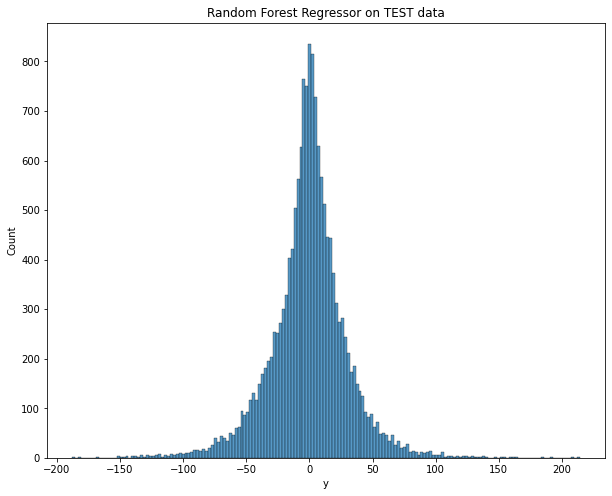

In [55]:
sns.histplot(y_test-forest_predictions).set(title='Random Forest Regressor on TEST data')

# PERFORMANCE OF MODEL ON TEST DATA

In [53]:
from sklearn import metrics

print(f"R squared Score         ::   {r2_score(y_TEST, final_predictions)}")
print(f"Mean Squared Error      ::   {metrics.mean_squared_error(y_TEST, final_predictions)}")
print(f"Mean Absolute Error     ::   {metrics.mean_absolute_error(y_TEST, final_predictions)}")
print(f"Root Mean Squared Error ::   {np.sqrt(metrics.mean_squared_error(y_TEST, final_predictions))}")

R squared Score         ::   0.8619328995956502
Mean Squared Error      ::   1951.1125181250002
Mean Absolute Error     ::   33.447978500000005
Root Mean Squared Error ::   44.17139932269522


The model performed well on unseen data as the results for TEST data are not far off from vaidation data. R-squared error for TEST data is 86.19% as compared to 93.38% for validation data. RMSE for TEST data (unseen data) is 44.17 as compared to 30.33 for validation data. Finally, we can draw a conclusion that Random Forest Regressor performed well on this particular regression problem both on validation data and useen TEST data. The model therefore is reliable and it does not lead to Underfitting / Overfitting. 